In [53]:
import pandas as pd
from pathlib import Path

In [54]:
shopping_data = Path("/Users/marylarson/Desktop/Projects/Project1/shopping_behavior_updated.csv")

In [55]:
shopping_data_df = pd.read_csv(shopping_data, encoding="ISO-8859-1")

In [56]:
shopping_data_df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [57]:
shopping_data_df["Age"]

0       55
1       19
2       50
3       21
4       45
        ..
3895    40
3896    52
3897    46
3898    44
3899    52
Name: Age, Length: 3900, dtype: int64

/var/folders/14/7d9mzy9947g1j96yg40ghhrw0000gn/T/ipykernel_5474/1810963884.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shopping_data_df.groupby("Age Groups")["Purchase Amount (USD)"].sum().plot(kind='bar', color=colors, title = "Total amount spent by Age Group (USD)")


<Axes: title={'center': 'Total amount spent by Age Group (USD)'}, xlabel='Age Groups'>

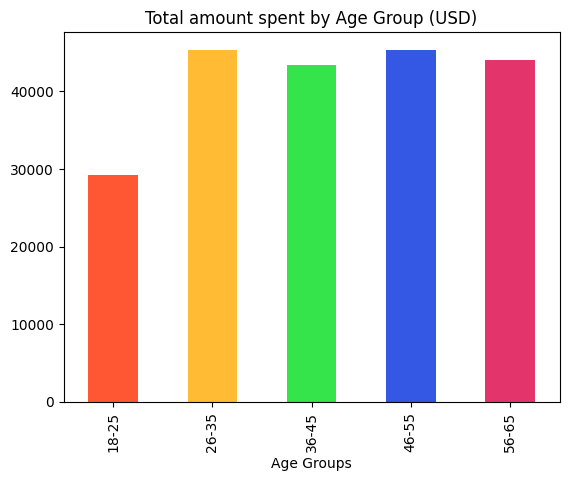

In [70]:
#Segment into Age Groups

import pandas as pd

data = shopping_data_df["Age"]
df = pd.DataFrame(data, columns=['Age'])

# Define age group bins
bins = [18, 25, 35, 45, 55, 65]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65']

# Create a new column for age groups
colors = ['#FF5733', '#FFBB33', '#34E44A', '#3457E4', '#E4346C']
shopping_data_df["Age Groups"] = pd.cut(shopping_data_df["Age"], bins=bins, labels=labels, right=False)
shopping_data_df.groupby("Age Groups")["Purchase Amount (USD)"].sum().plot(kind='bar', color=colors, title = "Total amount spent by Age Group (USD)")

In [59]:
# Group by item purchased

df = shopping_data_df.copy()

item_grouped_df = df.groupby('Item Purchased')

group_counts = df.groupby('Item Purchased')


print(group_counts)



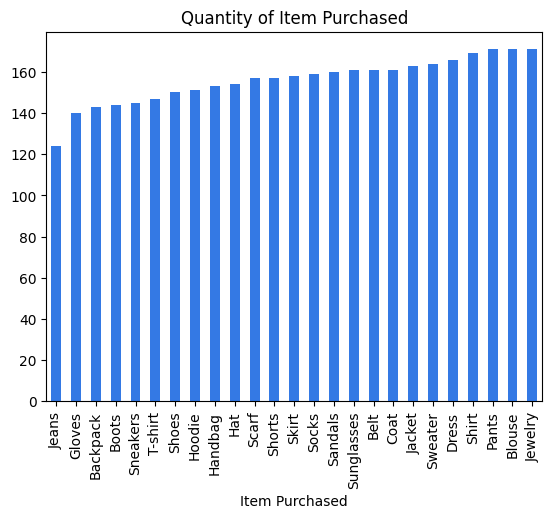

In [60]:
colors = ['#3479E4']
item_quantity_purchased = item_grouped_df.size().sort_values().plot(kind="bar", color=colors, title = "Quantity of Item Purchased")

In [61]:
df['Item Purchased'].unique()

array(['Blouse', 'Sweater', 'Jeans', 'Sandals', 'Sneakers', 'Shirt',
       'Shorts', 'Coat', 'Handbag', 'Shoes', 'Dress', 'Skirt',
       'Sunglasses', 'Pants', 'Jacket', 'Hoodie', 'Jewelry', 'T-shirt',
       'Scarf', 'Hat', 'Socks', 'Backpack', 'Belt', 'Boots', 'Gloves'],
      dtype=object)

In [62]:
df = shopping_data_df.copy()
gender_grouped = df.groupby('Gender').size()
gender_grouped


Gender
Female    1248
Male      2652
dtype: int64

<Axes: title={'center': 'Number of Men and Women'}>

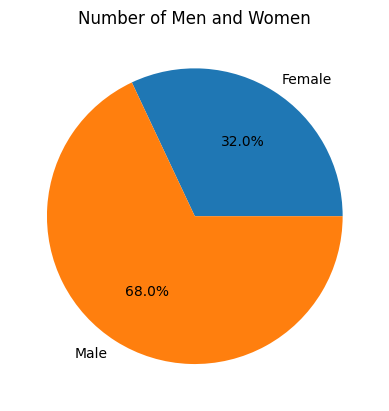

In [73]:
import matplotlib.pyplot as plt
sizes = [32, 68]

fig, ax = plt.subplots()
gender_grouped.plot(kind="pie", title = "Number of Men and Women", ax=ax, autopct='%1.1f%%' )

<Axes: title={'center': 'Total Amount Spent by Men and Women (USD)'}, xlabel='Gender'>

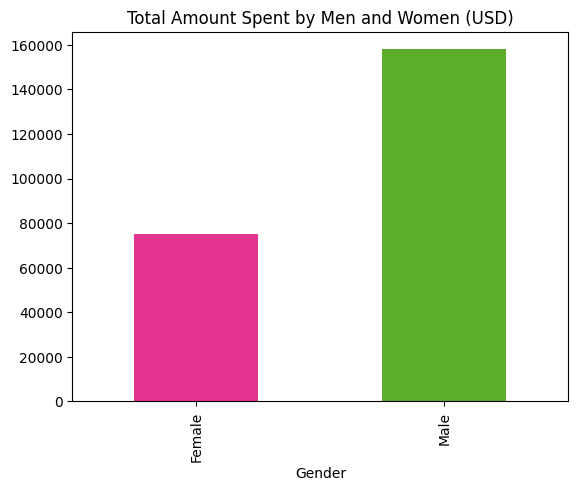

In [64]:
colors = ['#E43491', '#5DAD2C']
shopping_data_df.groupby(["Gender"])["Purchase Amount (USD)"].sum().plot(kind="bar", color=colors, title = "Total Amount Spent by Men and Women (USD)")

In [65]:
shopping_data_df.dtypes
#.groupby(["Age Group"])["Purchase Amount (USD)"].mean()#.plot(kind="bar")




Customer ID                  int64
Age                          int64
Gender                      object
Item Purchased              object
Category                    object
Purchase Amount (USD)        int64
Location                    object
Size                        object
Color                       object
Season                      object
Review Rating              float64
Subscription Status         object
Shipping Type               object
Discount Applied            object
Promo Code Used             object
Previous Purchases           int64
Payment Method              object
Frequency of Purchases      object
Age Groups                category
dtype: object

In [66]:
shopping_data_df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age Groups
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,56-65
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,18-25
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,46-55
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,18-25
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,46-55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly,36-45
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,46-55
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly,46-55
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly,36-45


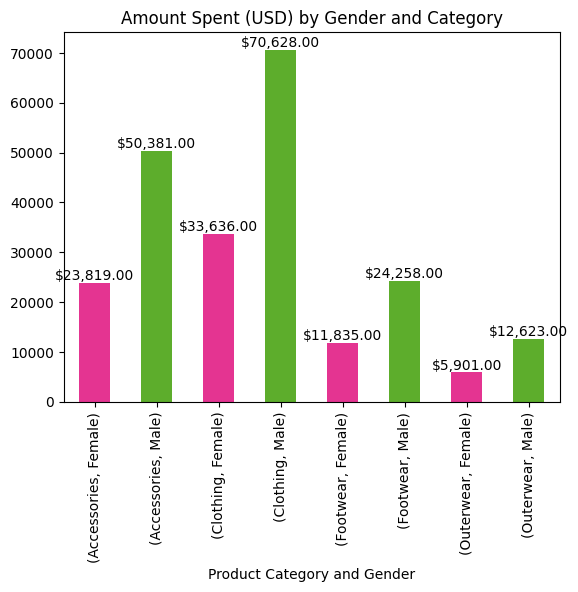

In [78]:
total_spend_categories_gender = shopping_data_df.groupby(['Category', 'Gender'])['Purchase Amount (USD)'].sum()
colors = ['#E43491', '#5DAD2C']

bars = total_spend_categories_gender.plot(kind='bar', color=colors, title = "Amount Spent (USD) by Gender and Category")
plt.xlabel('Product Category and Gender')

for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'${height:,.2f}',
                  (bar.get_x() + bar.get_width() / 2, height),
                  ha='center',
                  va='center',
                  xytext=(0, 5),
                  textcoords='offset points')

/var/folders/14/7d9mzy9947g1j96yg40ghhrw0000gn/T/ipykernel_5474/1050490083.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_spend_categories_age_group = shopping_data_df.groupby(['Category', 'Age Groups'])['Purchase Amount (USD)'].sum()


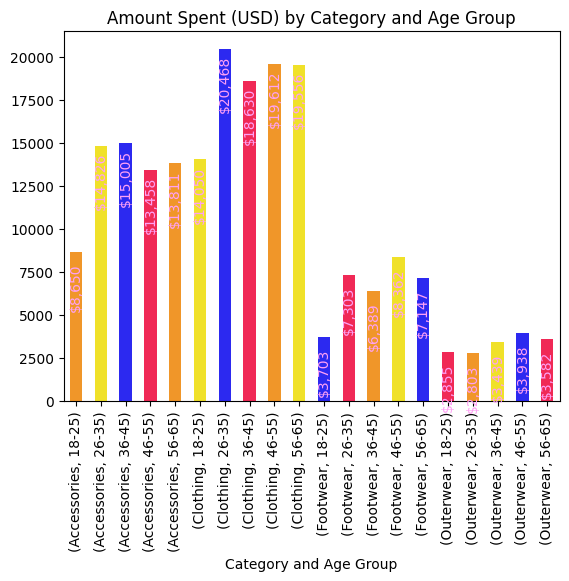

In [83]:
total_spend_categories_age_group = shopping_data_df.groupby(['Category', 'Age Groups'])['Purchase Amount (USD)'].sum()
colors = ['#F09629', '#F0E129', '#2C29F0', '#F02956']

bars = total_spend_categories_age_group.plot(kind='bar', color=colors, title="Amount Spent (USD) by Category and Age Group")
plt.xlabel('Category and Age Group')

for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'${height:,.0f}',
                  (bar.get_x() + bar.get_width() / 2, height),
                  ha='center',
                  va='center',
                  color='#FFA1F5',
                  textcoords='offset points',
                  xytext=(0, -25),
                  rotation=90)
